# Taller de Deep Learning sobre series temporales
## Dataset de RidershipDailyBoardingTotals

Equipo 
- Antonio Elias Sánchez Soto
- Daniela Mayté Vento Fernández
- Dayron Nuñez Chil 
- Yonathan Villavicencio Castillo

# Introducción al Análisis del Dataset RidershipDailyBoardingTotals

El transporte público es un pilar fundamental en la vida urbana moderna, facilitando la movilidad de millones de personas y contribuyendo al desarrollo económico y social de las ciudades. En este contexto, el dataset **RidershipDailyBoardingTotals** ofrece una valiosa oportunidad para explorar y comprender los patrones de uso del sistema de transporte público de Chicago, gestionado por la Chicago Transit Authority (CTA).

Este conjunto de datos recopila el número total de abordajes diarios desde el año 2001, permitiendo analizar tendencias a largo plazo, identificar variaciones estacionales y evaluar el impacto de eventos extraordinarios, como feriados o crisis sanitarias. A través del análisis de estas cifras, es posible obtener información clave para la planificación urbana, la optimización de recursos y la toma de decisiones informadas en políticas de movilidad.

En este análisis, se explorarán las principales características del dataset, se identificarán patrones relevantes y se discutirán posibles aplicaciones de los hallazgos, con el objetivo de aportar una visión integral sobre la dinámica del transporte público en una de las ciudades más grandes de Estados Unidos.

**El objetivo será predecir el comportamiento del transporte público diario para el caso específico de los trenes.**

## Carga del Dataset

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Durante el desarrollo del análisis se emplean las librerías tensorflow para la construcción de redes, matplotlib para la elaboración de gráficos, pandas en el trabajo con data frames y pathlib para acceder a la ubicación necesaria.

Statsmodels para el análisis estadístico y econométrico de los datos. Sklearn para el preprocesamiento de los datos. Numpy para el trabajo con vectores.

A continuación se refleja el script para descargar y descompirimir el dataset correspondiente.

In [27]:
# Descargar datos, en el directorio actual
#tf.keras.utils.get_file(
#    "ridership.tgz",
#    "https://github.com/ageron/data/raw/main/ridership.tgz",
#    cache_dir=".",
#    extract=True,
#)

Se tienen las columnas de:
- service_date con la fecha del servicio
- day_type con W como días laborables, A como Sábado y U como domingos o día festivo
- bus para el total de abordajes en los autobuses durante el día
- rail_boardings para el total de abordajes en el sistema de trenes durante el día
- total_rides para el total de abordajes en el sistema de transporte público en el día

In [28]:
path = Path("RidershipDailyBoardingTotals.csv")                               # Ruta donde se encuentra el archivo a cargar
df = pd.read_csv(path, parse_dates=["service_date"])                          # Lee el arvhivo y toma parse_dates como columna de fechas


df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01,U,297192,126455,423647
1,2001-01-02,W,780827,501952,1282779
2,2001-01-03,W,824923,536432,1361355
3,2001-01-04,W,870021,550011,1420032
4,2001-01-05,W,890426,557917,1448343


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7701 entries, 0 to 7700
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   service_date    7701 non-null   datetime64[ns]
 1   day_type        7701 non-null   object        
 2   bus             7701 non-null   int64         
 3   rail_boardings  7701 non-null   int64         
 4   total_rides     7701 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 300.9+ KB


In [30]:
df.describe()

,service_date,bus,rail_boardings,total_rides
count,7701,7.701000e+03,7.701000e+03,7.701000e+03
mean,2011-06-22 00:22:37.537982208,7.527179e+05,5.413338e+05,1.294052e+06
min,2001-01-01 00:00:00,8.078300e+04,2.354400e+04,1.100470e+05
25%,2006-04-10 00:00:00,5.069290e+05,3.556960e+05,8.865430e+05
50%,2011-07-18 00:00:00,8.346400e+05,6.093250e+05,1.522615e+06
75%,2016-08-23 00:00:00,9.760220e+05,7.103610e+05,1.649729e+06
max,2021-11-30 00:00:00,1.211992e+06,1.146516e+06,2.049519e+06
std,NaN,2.622677e+05,2.053125e+05,4.522545e+05


## Preprocesamiento

In [31]:
df.columns = ["date", "day_type", "bus", "rail", "total"]                     # Renombra las columnas del dataframe a algo más sencillo
df = df.sort_values("date").set_index("date")                                 # Ordena el dataframe en base a la columna date y la selecciona como indice
df = df.drop(["total", "bus"], axis=1)                                                 # Elimina la columna total, al ser innecesario para el análisis
df = df.drop_duplicates()                                                     # Elimina meses duplicados

df.head()

,day_type,rail
date,,
2001-01-01,U,126455
2001-01-02,W,501952
2001-01-03,W,536432
2001-01-04,W,550011
2001-01-05,W,557917


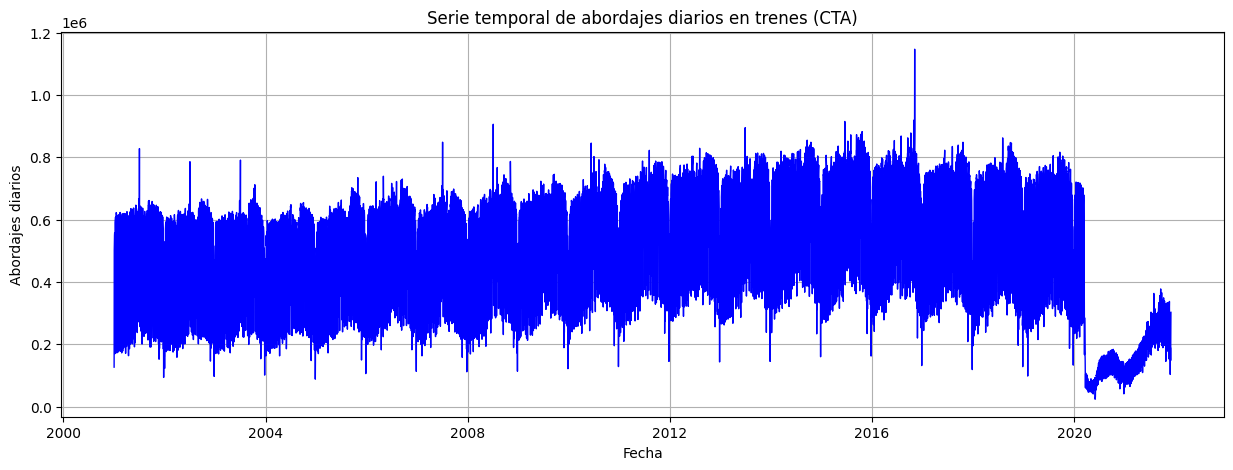

In [32]:
# Visualización de la serie temporal completa
plt.figure(figsize=(15,5))
plt.plot(df["rail"], color='blue', linewidth=1)
plt.title('Serie temporal de abordajes diarios en trenes (CTA)')
plt.xlabel('Fecha')
plt.ylabel('Abordajes diarios')
plt.grid(True)
plt.show()

In [33]:
# Prueba de estacionariedad ADF (Augmented Dickey-Fuller)
resultado_adf = adfuller(df["rail"])
print("\nPrueba de estacionariedad ADF:")
print(f"Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"Valor p: {resultado_adf[1]:.4f}")

if resultado_adf[1] < 0.05:
    print("Interpretación: La serie es probablemente estacionaria (rechazamos la hipótesis nula).")
else:
    print("Interpretación: La serie NO es estacionaria (no se rechaza la hipótesis nula).")


Prueba de estacionariedad ADF:
Estadístico ADF: -2.4551
Valor p: 0.1268
Interpretación: La serie NO es estacionaria (no se rechaza la hipótesis nula).


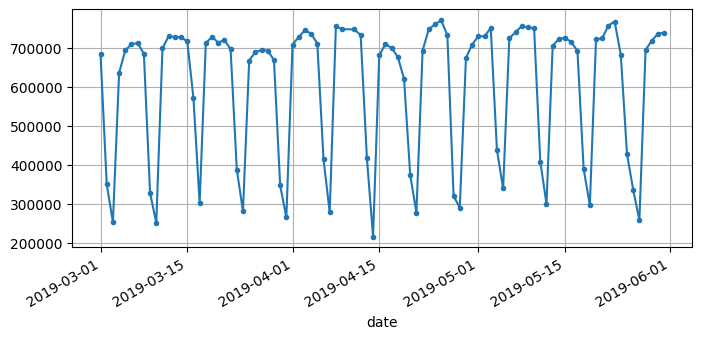

In [34]:
# Grafica de algunos meses del año 2019
df["rail"]["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

In [35]:
# Escalar los datos
scaler = MinMaxScaler()
df["rail"]=df["rail"].values.reshape(-1, 1)

In [36]:
#Particion de set de datos Train,Validation y Test
rail_train = df["rail"]["2016-01":"2018-12"] / 1e6 
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

scaler.fit(rail_train.values.reshape(-1,1))
scaler.fit(rail_valid.values.reshape(-1,1))
scaler.fit(rail_test.values.reshape(-1,1))

print("Tamaño Train = " , rail_train.to_numpy().shape)
print("Tamaño Valid = " , rail_valid.to_numpy().shape)
print("Tamaño Test = "  , rail_test.to_numpy().shape)

Tamaño Train =  (1090,)
Tamaño Valid =  (149,)
Tamaño Test =  (910,)


In [37]:
# Convirtiendo datos en series de tiempo
seq_length = 56                                                 # Series o pasos de tiempo como entrada para predecir el siguiente paso
tf.random.set_seed(42)                                          # Grantizar la reproducibilodad de los resultados
train_ds = tf.keras.utils.timeseries_dataset_from_array(        # Creacion de data set de series de tiempo
    rail_train.to_numpy(),                                      # Datos
    targets=rail_train[seq_length:],                            # Valores Objetivo - para que el modelo tome las primeras 56 muestras como entrada y trata de predecir la siguiente
    sequence_length=seq_length,                                 # Longitud de de secuencia de entrada
    batch_size=32,                                              # Dataset dividido en lotes (32)
    shuffle=True,                                               # Mezcar los datos
    seed=42                                                     # Semilla para procurar la reproducibilidad
)

In [38]:
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_valid.to_numpy(),          # Datos de entrada convertidos a un array NumPy, en este caso las observaciones del dataset 'rail_valid'.
    targets=rail_valid[seq_length:],  # Objetivos o etiquetas para el entrenamiento, desplazados para alinear con las secuencias de entrada (se omiten los primeros 'seq_length' datos).
    sequence_length=seq_length,    # Longitud de cada secuencia temporal que se extraerá del array de entrada.
    batch_size=32                 # Tamaño de lote para procesar los datos en grupos durante el entrenamiento o validación.
)


In [39]:
def crear_secuencias(datos, longitud_ventana):
    X, y = [], []
    for i in range(len(datos) - longitud_ventana):
        X.append(datos[i:i+longitud_ventana])
        y.append(datos[i+longitud_ventana])
    return np.array(X), np.array(y)

# Escala y crea secuencias para cada partición
def preparar_particion(serie, scaler, seq_length):
    datos = scaler.transform(serie.values.reshape(-1,1))
    X, y = crear_secuencias(datos, seq_length)
    return X, y

X_train, y_train = preparar_particion(rail_train, scaler, seq_length)
X_valid, y_valid = preparar_particion(rail_valid, scaler, seq_length)
X_test,  y_test  = preparar_particion(rail_test, scaler, seq_length)

## Construcción de Modelos

In [40]:
# Función para entrenar y evaluar un modelo de TensorFlow/Keras
def fit_and_evaluate(model, train_set, valid_set, learning_rate, epochs=33):
    # Callback para detener el entrenamiento temprano si la métrica de validación no mejora
    # Restaura los pesos del mejor modelo encontrado durante el entrenamiento
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=70, restore_best_weights=True
    )

    # Optimizador SGD con momentum para mejorar la convergencia
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    # Compilar el modelo con función de pérdida Huber (robusta a outliers),
    # optimizador SGD y métrica de error absoluto medio (MAE)
    model.compile(
        loss=tf.keras.losses.Huber(),
        optimizer=optimizer,
        metrics=["mae"]
    )

    # Entrenar el modelo usando los datos de entrenamiento y validación,
    # con el callback de early stopping para evitar sobreajuste
    history = model.fit(
        train_set,
        validation_data=valid_set,
        epochs=epochs,
        callbacks=[early_stopping_cb]
    )

    # Evaluar el modelo en el conjunto de validación para obtener pérdida y MAE
    valid_loss, valid_mae = model.evaluate(valid_set)

    # Multiplicar MAE por 1 millón para facilitar la interpretación o presentación de resultados
    return valid_mae * 1e6 # Un MAE bajo = mejor desempeño del modelo

### Explicación conceptual de términos usados en el entrenamiento del modelo

**EarlyStopping**
Es una técnica que detiene automáticamente el entrenamiento del modelo cuando la métrica de validación (en este caso, el MAE) deja de mejorar después de un número determinado de épocas (paciencia). Esto ayuda a evitar el sobreajuste, es decir, que el modelo aprenda demasiado los datos de entrenamiento y pierda capacidad de generalización para datos nuevos.

**val_mae (Error Absoluto Medio en validación)**
El MAE mide el promedio de la diferencia absoluta entre las predicciones del modelo y los valores reales. En el contexto del dataset de abordajes diarios, indica cuán lejos están las predicciones del número real de pasajeros que abordaron el tren cada día. Un MAE bajo significa predicciones más precisas.

**SGD (Stochastic Gradient Descent - Descenso de Gradiente Estocástico)**
Es un algoritmo de optimización que ajusta los pesos del modelo para minimizar la función de pérdida. En lugar de usar todo el conjunto de datos a la vez, actualiza los pesos usando pequeños lotes (batches), lo que hace el entrenamiento más eficiente. El momentum ayuda a acelerar el aprendizaje y a evitar quedar atrapado en mínimos locales.

**Función de pérdida Huber**
Es una función que combina las ventajas del error cuadrático medio y el error absoluto medio. Es menos sensible a valores atípicos (outliers) que el error cuadrático, lo que es útil cuando el dataset puede tener días con números de abordajes muy inusuales, como eventos especiales o interrupciones del servicio.

**Métrica MAE (Mean Absolute Error - Error Absoluto Medio)**
Mide la precisión del modelo calculando el promedio de las diferencias absolutas entre las predicciones y los valores reales. Es fácil de interpretar porque está en las mismas unidades que los datos (número de abordajes diarios).

**train_set (Conjunto de entrenamiento)**
Es el subconjunto de datos usados para que el modelo aprenda los patrones y relaciones entre las fechas y el número de abordajes diarios en el sistema de trenes.

**valid_set (Conjunto de validación)**
Es un subconjunto separado de datos que no se usa para entrenar, sino para evaluar el desempeño del modelo durante el entrenamiento. Permite medir qué tan bien el modelo generaliza a datos nuevos.

**epochs (Épocas)**
Cada época es un ciclo completo en el que el modelo procesa todo el conjunto de entrenamiento una vez. Entrenar por varias épocas permite que el modelo ajuste mejor sus parámetros para mejorar las predicciones.

**Batch size (Tamaño de lote)**
Número de secuencias o muestras que el modelo procesa antes de actualizar sus parámetros. Un tamaño de lote de 32 significa que el modelo ajusta sus pesos después de ver 32 secuencias de datos.

**Simple RNN(Recurrent Neural Network)**

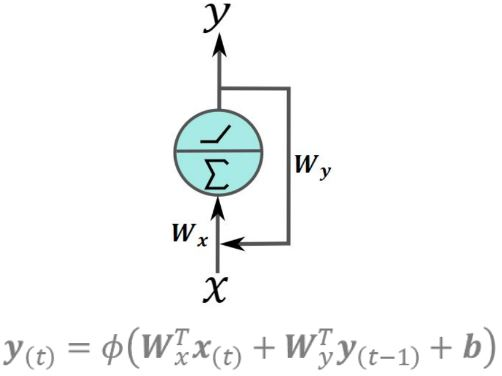

Una Simple RNN funciona como si estuvieras leyendo una frase palabra por palabra, recordando lo que leíste antes para entender mejor el contexto. Procesa los datos secuenciales uno a uno, y en cada paso guarda una "memoria" o resumen de la información pasada. Esta memoria se combina con el nuevo dato para actualizar su comprensión, permitiendo que la red tenga en cuenta lo que ocurrió anteriormente al tomar decisiones o hacer predicciones. Así, la Simple RNN puede captar patrones en secuencias de datos, usando la información previa para influir en el procesamiento actual, de manera similar a cómo nosotros entendemos una historia recordando lo que pasó antes.

In [ ]:
model = tf.keras.Sequential([                                                   
    tf.keras.layers.Input(shape=(None, 1)),              # Capa de Input
    tf.keras.layers.SimpleRNN(1)                         # Capa con una RNN (Recurrent Neural Network)
])

**DEEP RNN**

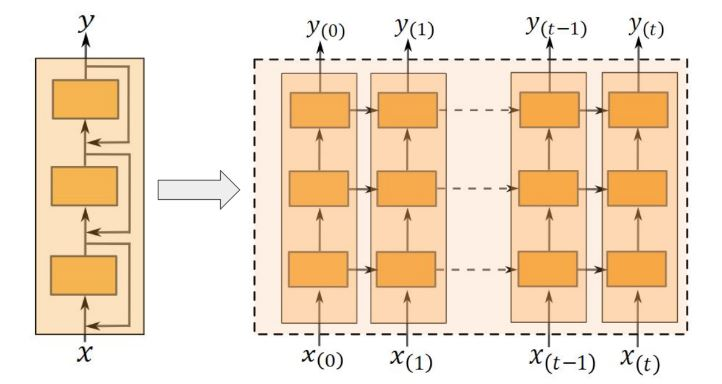

Una Deep RNN funciona como si estuvieras leyendo una frase palabra por palabra, pero en lugar de solo recordar lo que leíste antes, tienes varios niveles de memoria trabajando al mismo tiempo. Cada nivel procesa la información y pasa un resumen más elaborado al siguiente nivel, como si primero entendieras el significado de cada palabra, luego la estructura de la oración, y finalmente el contexto completo del párrafo. Así, la red no solo recuerda lo que pasó antes, sino que también puede captar patrones más complejos y profundos en la secuencia de datos. Esto le permite hacer predicciones más precisas y entender mejor la información, igual que cuando tú lees y comprendes un texto en varios niveles para captar todos sus matices.

In [42]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
deep_model = tf.keras.Sequential([                                                # Modelo secuencial
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),  # Capa con 32 RNN, la cual tiene como salida cada paso de tiempo
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(1)                                                  # Capa con 1 RNN, la cual tiene como salida el ultimo paso de tiempo
])

d:\Coding\Laboratorios IA\entorno\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**DEEP LSTM(The Long Short-Term Memory)**

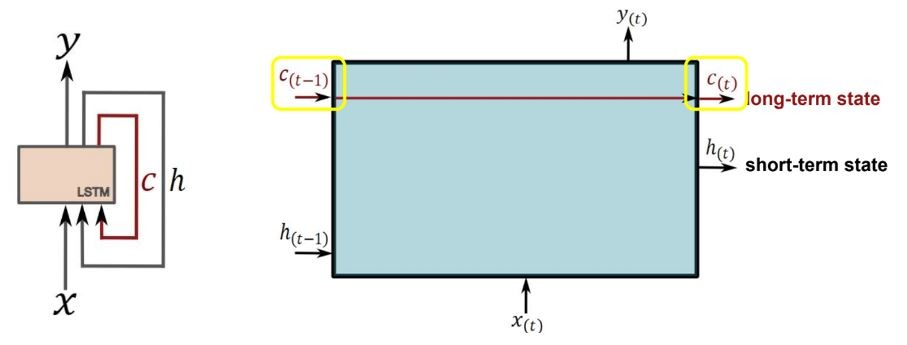

Una Deep LSTM (Long Short-Term Memory profunda) funciona como si estuvieras leyendo una historia palabra por palabra, pero con una memoria mucho más sofisticada y en varios niveles. En cada paso, no solo recuerdas lo que leíste antes, sino que también decides cuidadosamente qué información nueva guardar, cuál olvidar y cuál usar para entender mejor el contexto actual. Esto se logra gracias a unas "puertas" especiales que controlan el flujo de información: la puerta de entrada decide qué datos nuevos guardar, la puerta de olvido elimina lo que ya no es relevante, y la puerta de salida determina qué información usar para la predicción en ese momento.

Al apilar varias capas de estas unidades LSTM, la red puede captar patrones complejos y dependencias a largo plazo en la secuencia, como entender no solo palabras aisladas, sino frases completas y el contexto general de un párrafo. Esto hace que las Deep LSTM sean ideales para tareas como predecir el número diario de abordajes en un sistema de trenes, donde la información pasada puede influir en el futuro a diferentes escalas de tiempo.

In [43]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]),      # Modelo secuencial
    tf.keras.layers.LSTM(32, return_sequences=True),                             # Capa con 32 LSTM, la cual tiene como salida cada paso de tiempo
    tf.keras.layers.LSTM(1)                                                      # Capa con 1 LSTM, la cual tiene como salida el ultimo paso de tiempo
])


**DEEP GRU**

Comparativa entre los modelos usados:

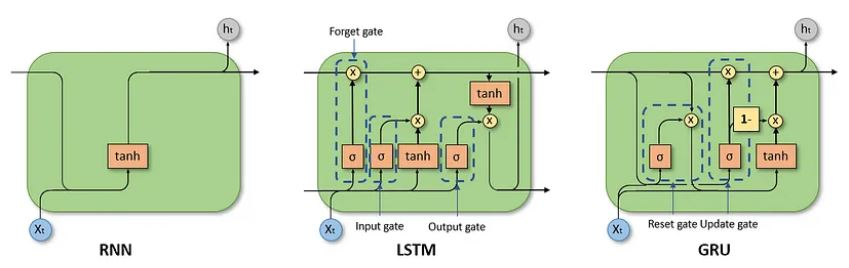

Una Deep GRU (Gated Recurrent Unit profunda) funciona como si estuvieras leyendo una historia palabra por palabra, pero con una memoria simplificada y eficiente que decide qué información conservar y cuál olvidar en cada paso. A diferencia de las LSTM, que tienen tres puertas para controlar la memoria, la GRU utiliza solo dos: una puerta de actualización, que decide cuánto de la información pasada mantener, y una puerta de reinicio, que determina cuánto de la información anterior olvidar al procesar la nueva entrada.

Al apilar varias capas de estas unidades GRU, la red puede capturar patrones complejos y dependencias a largo plazo en la secuencia, pero con una arquitectura más simple y un entrenamiento más rápido que las Deep LSTM. Esto permite que la red aprenda qué información es relevante para conservar a lo largo del tiempo y qué información puede descartarse, facilitando predicciones precisas en datos secuenciales como el número diario de abordajes en un sistema de trenes.

In [44]:
gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True, input_shape=[None, 1]),      # Modelo secuencial
    tf.keras.layers.GRU(32, return_sequences=True),                             # Capa con 32 GRU, la cual tiene como salida cada paso de tiempo
    tf.keras.layers.GRU(1)                                                      # Capa con 1  GRU, la cual tiene como salida el ultimo paso de tiempo
])

## Evaluación

In [45]:
# Evaluación comparativa de modelos

# Diccionario para almacenar los MAE de cada modelo
resultados_mae = {}

# Entrena y evalúa cada modelo, guardando el MAE
resultados_mae['Simple RNN'] = fit_and_evaluate(model, train_ds, valid_ds, learning_rate=0.02)
resultados_mae['Deep RNN'] = fit_and_evaluate(deep_model, train_ds, valid_ds, learning_rate=0.02)
resultados_mae['Deep LSTM'] = fit_and_evaluate(lstm_model, train_ds, valid_ds, learning_rate=0.02)
resultados_mae['Deep GRU'] = fit_and_evaluate(gru_model, train_ds, valid_ds, learning_rate=0.02)

Epoch 1/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2906 - mae: 0.6145 - val_loss: 0.0877 - val_mae: 0.3797
Epoch 2/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0794 - mae: 0.3550 - val_loss: 0.0865 - val_mae: 0.3765
Epoch 3/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0775 - mae: 0.3487 - val_loss: 0.0831 - val_mae: 0.3677
Epoch 4/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0728 - mae: 0.3375 - val_loss: 0.0749 - val_mae: 0.3454
Epoch 5/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0627 - mae: 0.3066 - val_loss: 0.0505 - val_mae: 0.2682
Epoch 6/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0381 - mae: 0.2114 - val_loss: 0.0159 - val_mae: 0.1199
Epoch 7/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0142 - mae: 0.1428 - val_loss: 0.0135 - val_mae: 0.1383
Epoch 8/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mae: 0.1514 - val_loss: 0.0136 - val_mae: 0.1318
Epoch 9/33
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - 

In [46]:
# Recopilar los errores en una tabla
resultados_df = pd.DataFrame({
    'Modelo': list(resultados_mae.keys()),
    'MAE': list(resultados_mae.values())
})

print("Tabla comparativa de errores (MAE):")
print(resultados_df)

Tabla comparativa de errores (MAE):
       Modelo            MAE
0  Simple RNN  119329.214096
1    Deep RNN   42804.159224
2   Deep LSTM  131902.039051
3    Deep GRU  134880.110621


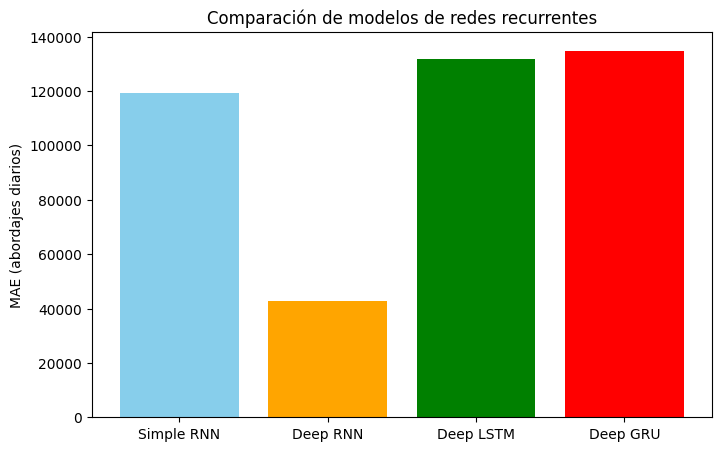

In [47]:
# Visualización gráfica de los errores
plt.figure(figsize=(8,5))
plt.bar(resultados_df['Modelo'], resultados_df['MAE'], color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel('MAE (abordajes diarios)')
plt.title('Comparación de modelos de redes recurrentes')
plt.show()

In [48]:
# Seleccionar el mejor modelo
mejor_modelo_nombre = resultados_df.loc[resultados_df['MAE'].idxmin(), 'Modelo']
print(f"El modelo seleccionado para el pronóstico es: {mejor_modelo_nombre}")

modelos_entrenados = {
    'Simple RNN': model,
    'Deep RNN': deep_model,
    'Deep LSTM': lstm_model,
    'Deep GRU': gru_model
}
mejor_modelo = modelos_entrenados[mejor_modelo_nombre]

El modelo seleccionado para el pronóstico es: Deep RNN


In [49]:
# Pronóstico autorregresivo de varios pasos
def pronostico_autorregresivo(modelo, secuencia_inicial, pasos, scaler):
    pronosticos = []
    secuencia = secuencia_inicial.copy()
    for _ in range(pasos):
        pred = modelo.predict(secuencia.reshape(1, -1, secuencia.shape[-1]))
        pronosticos.append(pred[0,0])
        secuencia = np.append(secuencia[1:], pred[0,0])
        secuencia = secuencia.reshape(-1, 1)
    pronosticos_desescalados = scaler.inverse_transform(np.array(pronosticos).reshape(-1,1)).flatten()
    return pronosticos_desescalados

# La última secuencia del conjunto de validación o test como punto de partida
ult_secuencia = X_test[-1]
pasos_futuros = 30  # 30 días

pronostico = pronostico_autorregresivo(mejor_modelo, ult_secuencia, pasos_futuros, scaler)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

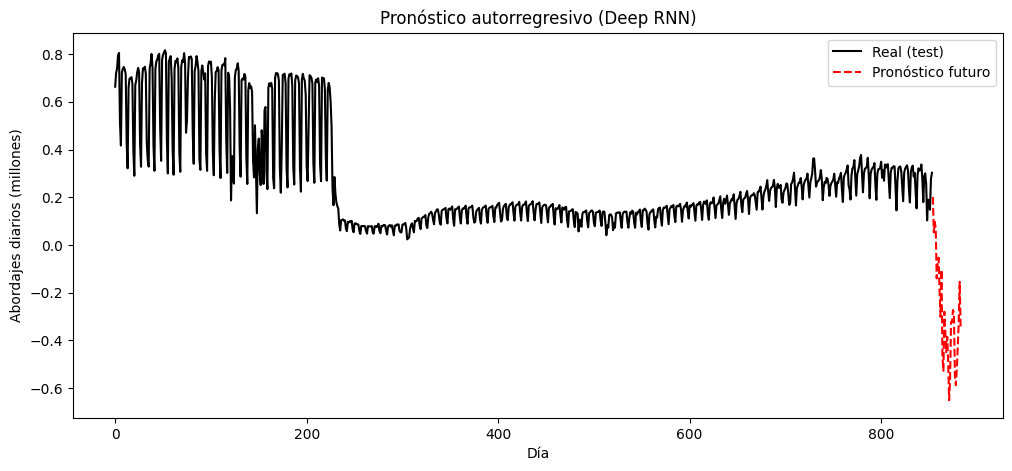

In [50]:
# Desescala los valores reales de test para comparar
y_test_real = scaler.inverse_transform(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test_real)), y_test_real, label='Real (test)', color='black')
plt.plot(np.arange(len(y_test_real), len(y_test_real)+pasos_futuros), pronostico, label='Pronóstico futuro', color='red', linestyle='dashed')
plt.title(f'Pronóstico autorregresivo ({mejor_modelo_nombre})')
plt.xlabel('Día')
plt.ylabel('Abordajes diarios (millones)')
plt.legend()
plt.show()

## Conclusiones

Tras evaluar varias arquitecturas de redes neuronales recurrentes para predecir los abordajes diarios en trenes, el modelo que obtuvo el menor MAE (mejor desempeño) fue la **Deep RNN**.

Se nota un decrecimiento en la cantidad de personas que toman este medio de transporte. Se debe, con certeza a la existencia de otros medios de transporte más modernos o cómodos. 

### ¿Por qué la Deep RNN fue la mejor?

- **Mayor capacidad para modelar dependencias temporales complejas:** Las Deep RNN, al tener múltiples capas recurrentes apiladas, pueden capturar patrones jerárquicos y relaciones a diferentes escalas de tiempo en la serie de datos.
- **Mejor precisión en predicciones:** Estudios muestran que las arquitecturas profundas de RNN superan en precisión a modelos superficiales como la Simple RNN y, en muchos casos, incluso a LSTM o GRU simples.
- **Capacidad para aprender representaciones más ricas:** La profundidad permite que el modelo extraiga características más abstractas y relevantes para la tarea, mejorando la generalización y reduciendo el error de predicción.
- **Adecuada para series temporales con múltiples escalas:** Cuando los datos presentan patrones complejos o múltiples factores temporales, las Deep RNNs son más eficientes para capturar estas dinámicas.